In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Problème d'obstacle

Dans la suite nous considérons $\Omega=(0,1)$ et regarderons le problème de minimisation suivant :
\begin{equation}
\label{P}
\min_{u\in D_h}\mathcal{J}[u],
\tag{$\mathcal{P}$}
\end{equation}
où $$ \mathcal{J}[u]:=\int_\Omega u'(x)^2\;dx $$
et
$$ K_h = \{ U\in \mathbb{R}^{N_h} \mid \forall 1\leq i\leq N_h, U_i \geq \Psi(x_i)\}, $$
où $\Psi(x)= e^{(−30(x − 0.5)^2)} − e^{(−30/4)}$.



**QN1)**   Écrire une fonction `A(n)` retournant la matrice associée à la discretisation du problème variationnel avec les éléments finis $\mathbb{P}_1$. On rappelle que pour les éléments finis $\mathbb P_1$, les fonctions $\phi_i$ sont données par 
$$
\phi_{i}(x)= 
\begin{cases}
\dfrac{x-x_{i-1}}{x_{i}-x_{i-1}},  &  \textrm{si } x_{i-1} \le  x \le  x_{i},  \\
\dfrac{x-x_{i+1}}{x_{i}-x_{i+1}},  &  \textrm{si } x_{i} \le  x \le x_{i+1},  \\
0,  &  \textrm{sinon.}  
\end{cases}
$$


In [2]:
def A(n):
    K=-(np.diag(np.ones(n-1),1)-2*np.eye(n)+np.diag(np.ones(n-1),-1))*(n+1)
    return K


**QN2)** Écrire une fonction `gradient(u0,t,epsilon,A,Psi,iterMax)` prennant en argument la valeur initiale `u0`, le pas `t`, le parametre `epsilon`, la matrice `A`, l'obstacle `Psi` et le nombre maximal d'iterations autorisées `iterMax`  . Cette fonction devra retourner:
- `u` dernier terme de la suite. 
- `err` liste de $\parallel \nabla  J_\epsilon(\bf u_k)\parallel$.

On arretera l'algorithme après 1000 iterations.

In [51]:
def gradient(u0,t,epsilon,A,Psi):
    G=[]
    u=u0
    for i in range(1000):
        d=-2*np.dot(A,u)+(2/epsilon)*np.maximum(Psi-u,0)
        tmp=u+t*d
        tmp[0]=0
        tmp[-1]=0
        G.append(np.linalg.norm(tmp-u))
        u=tmp
    return u,G


**QN3)** Implementer l'algorithme du gradient à pas fixe (`t` est le pas de descente) $\mathcal J_\epsilon$ et le tester pour  $N_h=30$, $t=0.005$ et $\epsilon\in\{10^2,1,0.1,0.01,0.001\}$.  Tracer sur une même figure les solutions $\bf u^\epsilon_h$ ainsi que la fonction $\Psi$. Commenter les resultats.


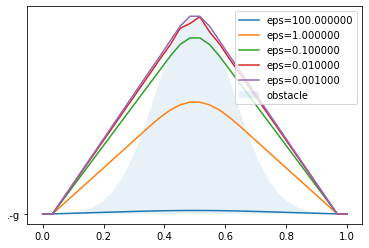

In [52]:

n=30

x=np.linspace(0,1,n+2)[1:-1]
psi=lambda x: np.exp(-30*(x-0.5)**2)-np.exp(-30/4)
psih=psi(x) 
t=0.005
tol=1.e-2

plt.figure(1)
for epsilon in [100,1,0.1,0.01,0.001]:
    u,G=gradient(np.zeros(n),t,epsilon,A(n),psih)
    plt.plot(np.hstack((0,x,1)),np.hstack((0,u,0)),label="eps=%f" %(epsilon))

plt.fill_between(x,psih,'.-g',label='obstacle',alpha=0.1)
plt.legend()

